# Robot Intelligence Tutorial 1: Numpy, Scipy, and the Cross-Entropy Method

The central purpose of this tutorial will be to introduce you to (or to review) the Python packages `numpy` and `scipy`. 

`Numpy` is the core library for scientific computing in Python. It is designed around the multidimensional array object, and provides high-performance implementations of common array (i.e. linear algebraic) operations. Many Python libraries for ML and/or deep learning are either directly integrated with `numpy` (e.g. [Jax](https://github.com/google/jax)) or draw heavy syntactical inspiration from it (e.g. [PyTorch](https://pytorch.org/)).

`Scipy` extends `numpy`, using `numpy` arrays 'under the hood' of all operations.  In the words of the `scipy` documentation: 

> "...[`scipy`] *adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.*"

`Scipy` is organized across subpackages, each covering different scientific computing domains. These subpackages must be imported individually. One `scipy` subpackage that you might find useful when for completing assignments for this class is `linalg`.


The `numpy` content of this tutorial draws from [this MIT CS231 tutorial](https://cs231n.github.io/python-numpy-tutorial/) while the `scipy` content draws from the library documentation.

After going over a few examples of basic functionalities in `numpy` and `scipy`, we'll conclude the tutorial with exercises implementing the derivative-free cross-entropy method (CEM).

In [ ]:
import numpy as np
from scipy import linalg

# Arrays


A numpy array is a grid of values, all of the same type (e.g. 8-bit integer, 16-bit float, etc.), and is index by a tuple of nonnegative integers. The *shape* of the array is a tuple of integers giving the size of the array along each dimension.

In [ ]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

You can read about other methods of array creation in [the documentation.](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation)

# Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

If you want to know more about array indexing you should read [the documentation.](https://numpy.org/doc/stable/reference/arrays.indexing.html)

# Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)            

Read more about numpy datatypes [here.](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

# Array math

## Basic operations

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is **transposing a matrix**; to transpose a matrix, simply use the `T` attribute of an array object:

In [ ]:
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

There are a lot more functions out there for manipulating arrays. For the full list, see [the documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

## Solving Linear Systems

Suppose that we have the linear system of equations below.
\begin{align}
x_1 + 2x_2 &= 1\\
3x_1 + 5x_2 &= 2
\end{align}

We can write this linear system in matrix form $Ax = b$ as:
\begin{align}
\begin{bmatrix}
1 & 2\\
3 & 5
\end{bmatrix} \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} = \begin{bmatrix} 1 \\ 2
\end{bmatrix} 
\end{align}


We can now use the `numpy` subpackage `linalg` to efficiently compute a solution to this system.


In [ ]:
A = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])

x = np.linalg.solve(A, b)
print(x)
np.allclose(np.dot(A, x), b) # assert that the solution is correct

What if we present `numpy.linalg.solve` with a linear system of equations that has no solution? In this case, `numpy` will raise an error (with type `LinAlgError`).

In [ ]:
A = np.array([[1, 2], [2, 4]]) # singular matrix case 1
b = np.array([1, 2])

x = np.linalg.solve(A, b)

In [ ]:
A = np.array([[1, 2], [1, 2]]) # singular matrix case 2
b = np.array([1, 2])

x = np.linalg.solve(A, b)

What about systems of equation that have irrational exact solutions? In this case, `numpy.linalg.solve` will return an approximate numerical result, correct up to floating point errors.

In [ ]:
A = np.array([[1, 2.0000001 * np.pi], [3, 5.0000001]])
b = np.array([np.pi, np.pi * np.e])

x = np.linalg.solve(A, b)
print(x)
np.allclose(np.dot(A, x), b) # assert that the solution is correct
np.linalg.norm(np.dot(A, x) - b) # print numerical errors

The norm of numerical errors that result when solving the system above is tiny, $\varepsilon < 10^{-15}$.

## Psueudorandomness



`Numpy` also supports a range of (pseudo-)random operations.

For example, we can create an array of a given shape populated with independent, random samples from a continuous uniform distribution over the interval [0, 1) with the function `rand` from the `numpy` subpackage `random`.

In [ ]:
 # create an array with 3 rows and 2 columns populated with independent samples 
 # from the unit uniform distribution
np.random.rand(3,2)

Similarly, we can create an array populated with independent, random samples from a multivariate, standard Gaussian with the function `multivariate_normal` from the same subpackage.

In [ ]:
 # create an array with 3 rows and 2 columns populated with samples from a 
 # 2-D Gaussian centered at 0, independent across dimensions X and Y s.t. 
 # std(X) = std(Y) = 1
np.random.multivariate_normal(np.zeros(2), np.eye(2), size=(3, 2))

Re-run the functions above a couple of times, and you'll see that the samples at each run are different. In machine learning, we use random operations quite frequently, e.g. when we initialize the weights of a neural network before starting training. To ensure that the results of random operations are exactly reproducible on a given machine, we employ **random-number generator seeding**. 

Before writing any code with randomly sampled components, we **always** manually set the RNG seed with the library underlying our sampling operations, whether `numpy` or `torch`.

In [ ]:
seed = 0 # sample RNG seed
np.random.seed(seed) # set seed to 0
x1 = np.random.rand(3,2) # create a (3, 2) array with random samples from U[0, 1)
x2 = np.random.rand(3,2) # create a 2nd array of samples without reseting seed
np.random.seed(seed) # reset seed to 0
x3 = np.random.rand(3,2) # create a 3rd array of samples after seed reset

not np.array_equal(x1, x2) and np.array_equal(x1, x3) # assert x1 != x2 and x1 == x3

# Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

`Numpy` broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

If you want to learn more about how exactly broadcasting works, take a look at the [`numpy` documentation.](https://numpy.org/doc/stable/user/basics.broadcasting.html)

# Linear Algebra with Scipy

The go-to package for more complex linear algebraic operations is `scipy.linalg`. 

## Least Squares Regression

`Scipy`'s `linalg` supports least squares regression, i.e. computing a vector of values $x$ that minimizes the total norm $|Ax - b|$.

Suppose we have the following data.

In [ ]:
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

We want to fit a quadratic polynomial of the form `y = a + b*x**2` to this data. We first form the “design matrix” $M$, with a constant column of 1s and a column containing the values `x**2`:

In [ ]:
M = x[:, np.newaxis]**[0, 2]
M

We want to find the least-squares solution to `M.dot(p) = y`, where `p` is a vector with length 2 that holds the parameters `a` and `b`.

In [ ]:
p, res, rnk, s = linalg.lstsq(M, y)
a, b = p
print(f'a = {a}, b = {b}')

Now, let's plot our results with `matplotlib.pyplot`.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

There are many, many more methods to `scipy.linalg` (e.g. computing eigenvalues and eigenvectors, inverses, decompositions, etc.). You can read about them [in the documentation, linked here](https://docs.scipy.org/doc/scipy/reference/linalg.html).

# Cross-Entropy Method (CEM)

Suppose that we have a "black-box" function $f: \mathcal{X} \mapsto \mathcal{Y}$. We don't know anything about the properties of $f$ (i.e. whether its differentiable, continuous, etc.). However, we *can* query it, i.e. evaluate $f(\cdot)$ for values $x \in \mathcal{X}$.

Let's say we want to model $f(\cdot)$ via a "proxy" function $\hat{f}(\cdot | \theta)$, which depends on some vector of parameters $\theta \in \Theta$. Our goal is to find a set of values $\hat{\theta} \in \Theta$ such that $\hat{f}(\cdot | \hat{\theta})$ is a good proxy (i.e. "model") for $f$. 

## Derivative Free Optimization

How can we go about estimating $\hat{\theta}$? We can break possible approaches across two classes:

1. **derivative-based** optimization methods (DBO); and
2. **derivative-free** optimization (DFO) methods.

These two classes are exactly what they sound like: *derivative-based* methods rely on exact derivatives or derivative estimates, while *derivative-free* methods forego derivatives entirely. 

In our case, our target function $f$ is a "black-box," and may not be differentiable, so we must rely on a DFO method to find a vector $\hat{\theta}$ that yields a "good" proxy $\hat{f}$.

At each iteration $i$ of any DFO method:
* We'll have some candidate value(s) of $\theta$, $\theta_i$.

* Next, we'll compute some measure of "how good" of a proxy the function $\hat{f}(\cdot | \theta_i)$ is for $f(\cdot)$ by either: (1) re-querying $f(\cdot)$ across some a set of points $x \in \mathcal{X}$; or (2) by using a fixed dataset $\mathcal{D}$ of queries $(x, y) \in \mathcal{X} \times \mathcal{Y}$ to $f(\cdot)$.

* Finally, we'll use our computed measures of "goodness" to revise our candidate values(s) in some way, yielding $\theta_{(i + 1)}$.

This process repeats until we are satisfied with $\hat{f}(\cdot | \theta_i)$.


## Cross-Entropy Method (CEM)

The cross-entropy method is a very simple DFO method for policy optimization. Below is a sketch.

* We select some distribution from which to sample values $\theta$, often a multinomial Gaussian. We'll use multinomial Gaussians as our basis for CEM in this tutorial.
* At each iteration $i$, we'll maintain a mean vector $\vec{\mu}_i$ and a covariance matrix $\Sigma_i$. 
* We'll then sample a batch of $N$ parameter vectors $\vec{\theta}$ from the distribution $\mathcal{N}(\vec{\mu}_i, \Sigma_i)$, $B_i = \{\theta \sim \mathcal{N}(\vec{\mu}_i, \Sigma_i): k \in \{1, \dots, N\} \}$.
* Next, we'll compute a measure of "goodness" for each sampled parameter vector $\vec{\theta}$.
* Finally, we update $\vec{\mu}_i$ and $\Sigma_i$ to reflect the top $(M/N)$-fraction of samples in our batch $B_i$, yielding $\vec{\mu}_{i+1}$ and $\Sigma_{i+1}$.

## Exercise I: Linear Regression with CEM

Suppose that we have the same data as earlier, in our exploration of `scipy.linalg`.

In [ ]:
x = np.array([[1, 2.5, 3.5, 4, 5, 7, 8.5]])
y = np.array([[0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6]])

We want to find a vector of parameters $\vec{\theta} = [m, b]$ such that $\sqrt{\sum_{(x, y) \in \mathcal{D}}((m * x + b) - y)^2)}$, i.e. the Frobenius norm of all residuals given our data, is minimized. Of course, the obvious way to do this is with simple linear least-squares regression. However, we'll see that we can compute a pretty good estimate for $\theta$ after just a few iterations of CEM!

Let's use a multivariate Gaussian with diagonal covariance matrix to sample candidate values of $m$ and $b$, i.e.

\begin{align}\vec{\theta} \sim \mathcal{N}\left(\begin{bmatrix} \mu_m \\ \mu_b \end{bmatrix}, \begin{bmatrix} \sigma^2_m & 0\\ 0 & \sigma^2_b \end{bmatrix}\right)\end{align}

Write a function that uses `numpy` to produce an array of size `(batch_size,)` of independent samples drawn from a multivariate Gaussian distribution with mean given by a (2, 1)-size vector `means`, and a diagonal covariance matrix with diagonal values given by a (2, 1)-size vector `diag_vars`.

In [ ]:
def get_candidate_theta_batch(means, diag_vars, batch_size):
  """"
  Returns an array of size `(batch_size, 2)` filled with independent samples of
  theta drawn from a multivariate Gaussian with mean vector `means` and 
  diagnonal covariance matrix with diagonal vector `diag_vars`.
  """
  return np.random.multivariate_normal(means, np.diag(diag_vars), size=(batch_size,))

Now, write a function that computes a `(batch_size,)` vector of norms given the data vectors `x`, `y` for a size `(batch_size,)` array of samples of $\vec{\theta}$. 

**Your implementation should contain no `for` loops** and should rely on numpy broadcasting instead.

You may use `np.linalg.norm` to compute the desired norm.

In [ ]:
def compute_norms_for_theta_batch(thetas, x=x, y=y):
  """
  Returns an array of size `(batch_size,)` corresponding to the Frobenius norm 
  over all residuals associated with each of the `batch_size` candidate values 
  of theta, where each theta = [m   b].
  """
  ms, bs = thetas[:, 0].reshape(-1, 1), thetas[:, 1].reshape(-1, 1)
  return np.linalg.norm((x.T.dot(ms.T) + bs.T) - y.T, axis=0)

Next, given a vector of samples of `theta` and the norms associated with each samples, compute a new pair of `(2,)`-size vectors of means and variances associated with top `elite_frac` proportion of samples (i.e. the `elite_frac * batch_size` samples with lowest associated norm).

In [ ]:
def get_new_means_and_vars(thetas, norms, elite_frac):
  """
  Returns two arrays each of size `(2,)` corresponding to the means and 
  variances associated with the top `elite_frac` proportion of theta samples
  `thetas`.
  """
  elite_idxs = norms.argsort()[:int(elite_frac * norms.shape[0])]
  elites = thetas[elite_idxs]
  return np.mean(elites, axis=0), np.var(elites, axis=0)

We can combine these pieces together to yield CEM. 

In [ ]:
num_iters = 100
elite_frac = 0.1
batch_size = 1000

means = np.ones(2)
diag_vars = np.ones(2)

for it in range(num_iters):
  thetas = get_candidate_theta_batch(means, diag_vars, batch_size)
  norms = compute_norms_for_theta_batch(thetas)
  means, diag_vars = get_new_means_and_vars(thetas, norms, elite_frac)
  print(f"iteration: {it}, mu: {means}, vars: {diag_vars}, average norm: {np.mean(norms)}")

Let's visualize how our CEM estimate for $\vec{\theta} = [m, b]$ compares to the values $\hat{m}, \hat{b}$ returned by `numpy`'s `polyfit` functionality.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x.reshape(-1), y.reshape(-1), 'o')
xx = np.linspace(0, 9, 101)
plt.plot(xx, means[0] * xx + means[1], label='CEM fit')
lsqlr_a, lsqlr_b = np.polyfit(x.reshape(-1), y.reshape(-1), deg=1) # np.polyfit: least-squares linear regression
plt.plot(xx, lsqlr_a * xx + lsqlr_b, label='LSQLR fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

# [Challenge] CEM for linear policy search

Suppose that we have a **reward function** $r: \mathcal{S} \times \mathcal{A} \mapsto [0, 1]$ and a **policy** parameterized by some set of parameters $\theta: \theta \in \Theta$, $\pi_{\theta} : \mathcal{S} \mapsto \mathcal{A}.$

The **reward function** returns the "reward" associated with taking any action $a \in \mathcal{A}$ in any state $s \in \mathcal{S}$ in some environment.


The **policy** is a function that maps environment states (or observations) to actions. A "good" policy is one that maps each state to a "good" action for that state, i.e. one associated with a higher *discounted* reward. An "optimal" policy is the one that maps each state to *the best* action for that state, i.e. the one associated with the highest discounted reward. 

We employ *discounted* rewards rather than *absolute* rewards when evaluating the "goodness" of a policy due to the [temporal credit assignment problem](https://ai.stackexchange.com/questions/12908/what-is-the-credit-assignment-problem), i.e. the phenomenon wherein there may be a state in which taking a certain action is met with *little* **immediate** *reward*, yet is *crucial to ensuring that* **future** *rewards* can be "collected" by the policy. You can read more about credit assignment and discount factors [here](https://en.wikipedia.org/wiki/Q-learning#Discount_factor).

Given some data of the value of the reward function for certain state-action pairs $(s, a) \in \mathcal{S} \times \mathcal{A}$, and/or the ability to query the environment for rewards associated with state-action pairs "online" by "rolling out" the policy, our goal is to find a set of values for our policy parameters $\hat{\theta}$ over the domain $\Theta$ such that $\pi_{\hat{\theta}}$ achieves as total reward as close to the maximum possible discounted reward as possible. This is the basic objective of the **reinforcement learning, or policy search, problem**.


## Exercise II: CEM for cart-pole

In [ ]:
! pip install pygame

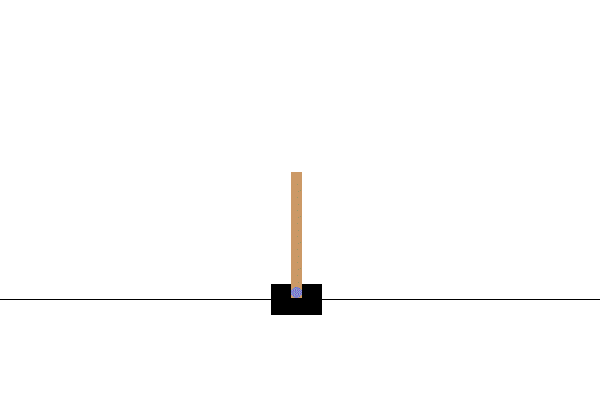

In this part of the tutorial, you'll implement CEM for the cart-pole environment. The cart-pole environment was introduced by reinforcement learning pioneers Barto, Suton, and Anderson in their 1983 seminal paper [Neuronlike adaptive elements that can solve difficult learning control problems](https://ieeexplore.ieee.org/document/6313077). It is a key toy problem for reinforcement learning. A render of this environment is shown above. 

The objective of the cart-pole environment is simple: a pole is attached to a cart with a single hinge, and the goal is to move the cart in such a way as to balance the pole for as long as possible. The *action-space*, i.e. the set of possible actions a policy can take at each time step is also simple: the cart can either be pushed to the right or to the left.

In this exercise, we will be considering the *discrete* version of this environment, where the amount of force we can apply either way is held fixed.

### Observation Space

At each time step of interaction, the environment returns an observation vector in the form of a `numpy.ndarray` with shape `(4,)` and values corresponding to positions and velocities of the cart and pole:

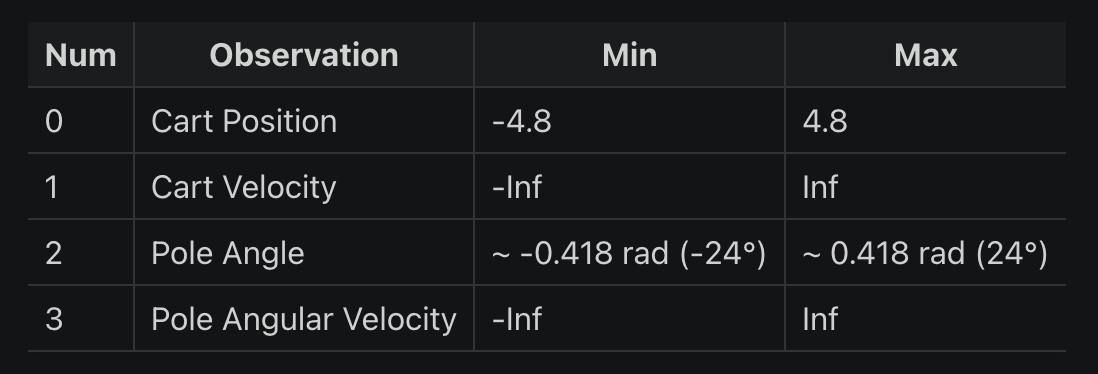

We will formally denote the observation vector as 

\begin{align}
\vec{o}(t) = \begin{bmatrix}
x_{\text{cart}}(t) & 
v_{\text{cart}}(t) & 
\alpha_{\text{pole}}(t) & 
\omega_{\text{pole}}(t)
\end{bmatrix}
\end{align} 

You can examine the actual observation vector returned by the environment via the code block below.

In [ ]:
import gym
import logging
logger = logging.getLogger('gym')


env = gym.make('CartPole-v0') # make a new instatiation of the cartpole-v0 environment
ob = env.reset() # reset the enviornment, starting a new episode and yielding `ob(0)`

ob

### Action Space

Our policy will take in an observation and transform it into a `numpy.ndarray` with shape `(1,)` and value corresponding to one of our two possible actions:



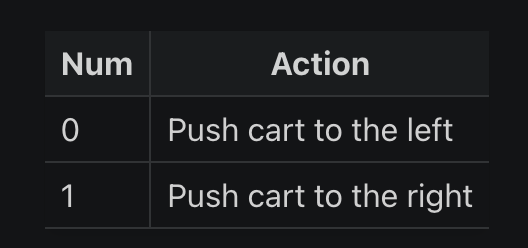

### Rewards

As mentioned above, the goal in this environment is to keep the pole upright for as long as possible up to some maximal number of timesteps. More precisely, an "episode" of interaction will end as soon as one of the following conditions is met:

* (Termination case): the pole angle exceeds $\pm 12^{\circ}$ (i.e. the pole leans too far right or left) and/or the cart position is greater than $\pm 2.4$ (i.e. the center of the cart reaches the end of the display).
* (Truncation case): the episode length exceeds 200 timesteps.

The environment returns a reward of `+1` for each step taken up to the end of the episode.

### Deterministic Linear Policy


Perhaps the simplest way we can imagine trying to solve this task is with a linear policy, i.e. $\theta := [\boldsymbol W, \boldsymbol b]$ where,

\begin{align}
\pi_{\theta}(o(t)) = \text{softmax}\left(o(t) \cdot \boldsymbol W + \boldsymbol b\right) = \begin{bmatrix}
\mathbb{P}[a(t) = 0] & \mathbb{P}[a(t) = 1]
\end{bmatrix}
\end{align}

and $\boldsymbol W \ $ is a `(4, 2)`-shape constant array, $\boldsymbol b \ $ is a `(1, 2)`-shape constant array, and "$\text{softmax}(\cdot)$" denotes the [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function), which transforms an arbitrary vector into discrete probability distribution. [Here is a link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html) to the `scipy` implementation of this function. Once we have computed the policy probabilities associated with each action as a function of the observation vector at each timestep, we'll output the action with the highest probability via the [`argmax` function](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

Our goal is to find values for the 2-D array $\boldsymbol W \ $ and  the vector $\boldsymbol b$ that yield a "good" linear policy for cartpole via CEM, i.e. a policy that results in a high total reward across interaction episodes.

### Getting our hands dirty

Let's now implement CEM to determine a deterministic linear policy for cartpole. To start, fill in the missing portions of the policy class.

In [ ]:
import gym
import logging
from gym.spaces import Box
from gym.spaces import Discrete
import numpy as np
import scipy
class DeterministicDiscreteActionLinearPolicy(object):
    def __init__(self, theta, ob_space, ac_space):
        """
        dim_ob: dimension of observations
        n_actions: number of actions
        theta: flat vector of parameters
        """
        dim_ob = ob_space.shape[0]
        n_actions = ac_space.n
        assert len(theta) == (dim_ob + 1) * n_actions
        self.W = theta[0 : dim_ob * n_actions].reshape(dim_ob, n_actions)
        self.b = theta[dim_ob * n_actions : None].reshape(1, n_actions)

    def act(self, ob):
        """
        Add in code here which, for an arbitrary observation vector, uses the
        policy attributes self.W and self.b to compute a probability vector over
        the two possible actions, and then return the action with the highest 
        associated probability
        """
        y = ob.dot(self.W) + self.b
        a = scipy.special.softmax(y).argmax()
        return a

Below is the method's we'll use to "rollout" our policy $\pi_{\theta}$ in the environment, i.e. evaluate its "goodness" by computing total discounted rewards associated with it by interactively collecting data up until an episode ends.

In [ ]:
def do_episode(policy, env, discount=1.0):
    """
    Given a `DeterministicDiscreteActionLinearPolicy` policy object, an
    instatiation of the cartpole gym environment, and a value for the discount
    factor, "rollout" an episode of interaction to yield a value for the total
    discounted reward associated with the rollout as well as the episode length
    (i.e. the total number of steps before truncation or termination cases the 
    episode to end).
    """
    disc_total_rew = 0
    ob = env.reset() # reset environment, to start a new episode
    t = 0
    while 1:
        a = policy.act(ob) # get an action from the policy
        (ob, reward, done, _info) = env.step(a) # "step" forward the environment -- i.e., apply the action from the policy at the current timestep, advancing the environment clock by 1
        disc_total_rew += reward * discount ** t # compute the discounted reward via the discount factor
        if done: break # check if the episode has ended
        t += 1 # increment the timestep counter
    return disc_total_rew, t # return the total discounted reward + timestep at episode end (i.e. the episode length)

It's now time for CEM. Replace all `None` values with your own code, and tune the hyperparameters. Can you get CEM to converge to a Gaussian distribution of parameter values that yields policies which successfully, consistently balance the pole for the maximum number of steps (200 in this case)?

In [ ]:
import gym
import logging
from gym.spaces import Box
from gym.spaces import Discrete
import numpy as np
from scipy import special

### CEM hyperparameters
n_iter = 20 # number of iterations of CEM
batch_size = 1000 # dimension of each batch
elite_frac = 0.1 # fraction of samples used as elite set
discount = 0.99 # must have value in range [0, 1]
logger = logging.getLogger('gym')
env = gym.make('CartPole-v0') # initialize environment
dim_theta = (env.observation_space.shape[0] + 1) * env.action_space.n # set dimension of the flat vector of parameters, theta

# Initialize mean and standard deviation for multivariate normal
theta_mean = np.zeros(dim_theta)
theta_std = np.ones(dim_theta)

### Main CEM loop
for itr in range(n_iter):
  thetas = np.random.multivariate_normal(mean=theta_mean, 
                                          cov=np.diag((theta_std**2)), 
                                          size=batch_size)
  rewards = []
  balanced_timesteps = []
  for theta in thetas:
    policy = DeterministicDiscreteActionLinearPolicy(theta,
                                                      env.observation_space, 
                                                      env.action_space) ## Initialize policy via `DeterministicDiscreteActionLinearPolicy` class
    reward, ts = do_episode(policy, env, discount=discount) ## Roll out each candidate policy once in the environment
    rewards += [reward]
    balanced_timesteps += [ts]
  rewards = np.array(rewards)
  balanced_timesteps = np.array(balanced_timesteps)

  elite_thetas = thetas[rewards.argsort()[-int(elite_frac * batch_size):]] ## Extract the 'elite' thetas
  theta_mean = elite_thetas.mean(axis=0).reshape(-1) ## Update theta mean
  theta_std = elite_thetas.std(axis=0).reshape(-1)  ## Update theta std

  ## Format and print CEM statistics for the current iteration
  print(', '.join([f'iteration {itr}',
                    f'mean disc reward: {np.mean(rewards)}',
                    f'max disc reward: {np.max(rewards)}',
                    f'mean ts balanced: {np.mean(balanced_timesteps)}']))